In [21]:
import pandas as pd

In [22]:
import numpy as np

In [23]:
import matplotlib.pyplot as plt

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
from sklearn import linear_model

In [60]:
import seaborn as sns
%matplotlib inline

In [27]:
# use Pandas to read in csv files.

In [29]:
train = pd.read_csv("train.csv")

In [16]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [31]:
test = pd.read_csv("test.csv")

In [32]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [21]:
print("Train data shape:", train.shape)

Train data shape: (1460, 81)


In [22]:
print("Test data shape:", test.shape)

Test data shape: (1459, 80)


In [23]:
print(train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [26]:
plt.style.use(style='ggplot')

In [27]:
plt.rcParams['figure.figsize'] = (10, 6)

In [28]:
# train.SalePrice.describe()

In [29]:
print (train.SalePrice.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [30]:
# to plot a histogram of SalePrice

In [31]:
print ("Skew is:", train.SalePrice.skew())

Skew is: 1.8828757597682129


(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

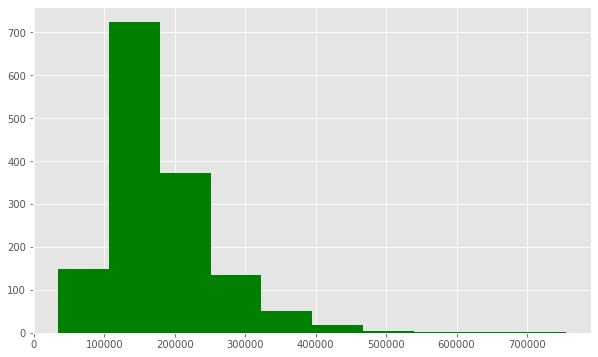

In [42]:
plt.hist(train.SalePrice, color='green')

In [34]:
target = np.log(train.SalePrice)

In [35]:
print ("\n Skew is:", target.skew())


 Skew is: 0.12133506220520406


(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

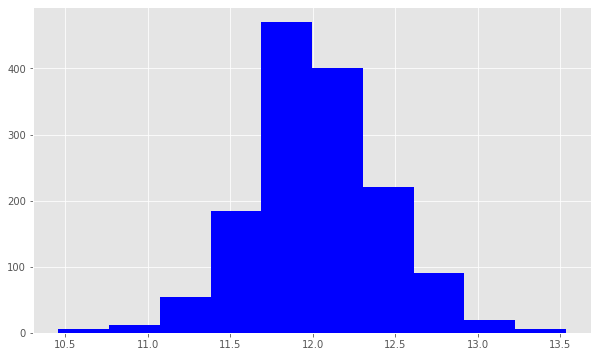

In [36]:
plt.hist(target, color='blue')

In [43]:
#   Working with Numeric Features  

In [44]:
numeric_features = train.select_dtypes(include=[np.number])

In [45]:
print(numeric_features.dtypes)

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object


In [46]:
corr = numeric_features.corr()

In [47]:
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 



In [48]:
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


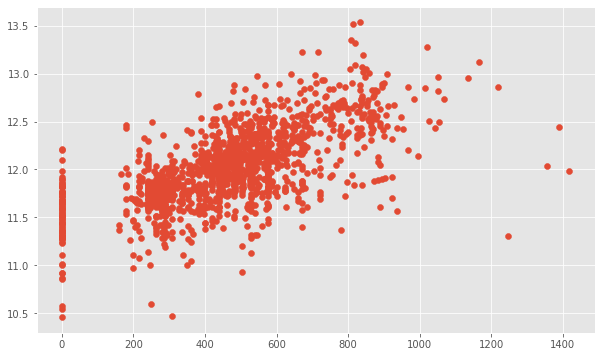

In [51]:
plt.scatter(x=train['GarageArea'], y=target)

Text(0.5, 0, 'Garage Area')

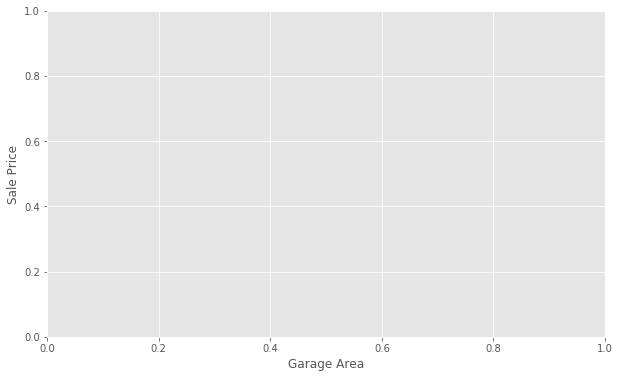

In [82]:
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')

In [54]:
# create a new dataframe with some outliers removed

In [74]:
train = train[train['GarageArea'] < 1200]

Text(0.5, 0, 'Garage Area')

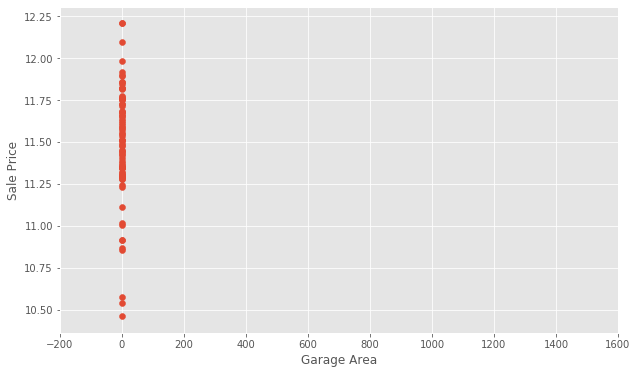

In [81]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600) 
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')

In [ ]:
#   Handling Null Values 

In [83]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'

In [84]:
print(nulls)

              Null Count
Feature                 
GarageType            81
PoolQC                81
GarageQual            81
GarageCond            81
GarageFinish          81
GarageYrBlt           81
MiscFeature           78
Alley                 72
FireplaceQu           72
Fence                 65
BsmtCond               7
LotFrontage            7
BsmtFinType2           7
BsmtExposure           7
BsmtFinType1           7
BsmtQual               7
YearRemodAdd           0
RoofStyle              0
RoofMatl               0
MasVnrArea             0
Exterior1st            0
Exterior2nd            0
MasVnrType             0
OverallCond            0
ExterQual              0


In [85]:
#   Wrangling the non-numeric Features 

In [86]:
categoricals = train.select_dtypes(exclude=[np.number])

In [87]:
print(categoricals.describe())

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count        81     81     9       81          81        81        81   
unique        4      2     2        2           4         1         4   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq         50     80     7       64          67        81        64   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count         81           81         81  ...          0            0   
unique         3           13          3  ...          0            0   
top          Gtl      Edwards       Norm  ...        NaN          NaN   
freq          76           22         65  ...        NaN          NaN   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count           0          0         81      0     16           3       81   
unique          0          0          3      0      3           2        6   
top           NaN        NaN      

In [89]:
# create a new column called enc_street. The pd.get_dummies() method will handle this for us

In [90]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(test.Street, drop_first=True)

In [91]:
print ('Encoded: \n')
print (train.enc_street.value_counts()) 

Encoded: 

1    80
0     1
Name: enc_street, dtype: int64


In [92]:
# look at SaleCondition by constructing and plotting a pivot table, as we did above for OverallQual

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

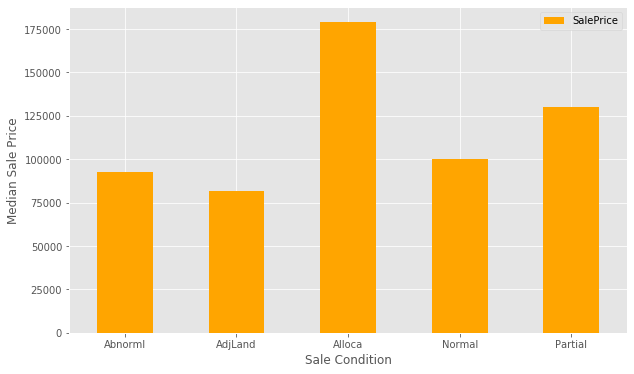

In [94]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='orange')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)

In [95]:
#   Dealing with missing values 

In [34]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [100]:
print(sum(data.isnull().sum() != 0))

0


In [11]:
#  3. Build a linear model 

In [35]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [ ]:
#    Linear Regression Model

In [38]:
# First, we instantiate the model.
lr = linear_model.LinearRegression()

In [39]:
model = lr.fit(X_train, y_train)

In [40]:
print("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.8627547060335314


In [41]:
# use the model we have built to make predictions on the test data set.
predictions = model.predict(X_test)

In [42]:
# calculates the rmse
print('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.023390905304161175


Text(0.5, 1.0, 'Linear Regression Model')

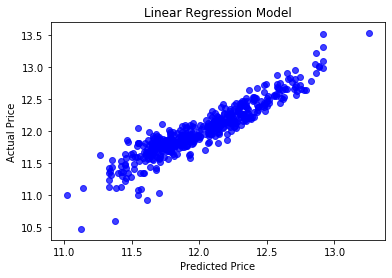

In [43]:
# view this relationship between predictions and actual_values graphically with a scatter plot.
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b')                                   # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

In [44]:
# experiment by looping through a few different values of alpha, and see how this changes our results.

In [46]:
for i in range (-2, 3):
    alpha = 10**i
    

In [47]:
rm = linear_model.Ridge(alpha=alpha)

In [48]:
ridge_model = rm.fit(X_train, y_train)

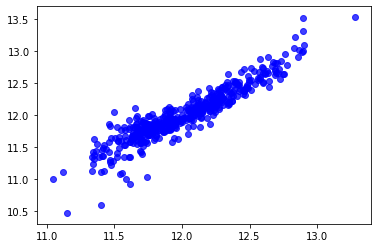

In [52]:
preds_ridge = ridge_model.predict(X_test)
plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')

In [72]:
preds =model.predict(X_test)
preds

array([11.93168802, 12.62248494, 11.67394653, 12.06066022, 12.64881222,
       11.32712086, 12.3700348 , 11.93080318, 11.32816969, 11.88074066,
       11.89718463, 11.71142405, 11.4285006 , 12.17827749, 12.09801378,
       11.80494472, 12.23909794, 11.75819489, 11.63977272, 12.28497138,
       12.04104223, 12.24230093, 12.12909605, 11.81925051, 12.22601042,
       11.87380258, 12.15714639, 11.46341078, 12.08314522, 12.0747936 ,
       11.67530716, 12.50874405, 12.14956756, 11.54712935, 12.51792509,
       11.94389835, 11.83069051, 12.28628783, 12.77459015, 11.51744007,
       11.83718365, 12.40048967, 11.62902776, 12.59498137, 11.77291353,
       11.60305743, 11.60466781, 11.77120405, 12.88201733, 11.68499313,
       11.63639866, 12.20969941, 11.65686364, 12.71482046, 11.92296907,
       12.35448591, 12.32612714, 11.90338671, 11.93158584, 11.70393594,
       11.3302888 , 11.90534928, 12.58570737, 12.40488107, 12.5498475 ,
       12.29889181, 11.52330674, 12.72542684, 11.63108284, 11.94

In [ ]:
#    4.  Make a submission 

In [73]:
# create a csv that contains the predicted SalePrice for each observation in the test.csv dataset.
submission = pd.DataFrame()

In [74]:
# The first column must the contain the ID from the test data.
submission['Id'] = test.Id

In [75]:
feats = test.select_dtypes(
    include=[np.number]).drop(['Id'], axis=1).interpolate()

In [76]:
# generate predictions
predictions = model.predict(feats)

In [77]:
final_predictions = np.exp(predictions)

In [78]:
# check the difference
print("Original predictions are: \n", predictions[:10], "\n")
print("Final predictions are: \n", final_predictions[:10])

Original predictions are: 
 [11.68819837 11.70231921 12.03301618 12.18402226 12.11126386 12.08177688
 12.19285315 12.05916917 12.19677171 11.68316508] 

Final predictions are: 
 [119157.13594261 120851.67044538 168218.02344465 195638.18856968
 181909.36779836 176623.7217266  197373.49941004 172675.46155989
 198148.43739513 118558.88982168]


In [79]:
# assign these predictions and check
submission['SalePrice'] = final_predictions
# submission.head()
print(submission.head())

     Id      SalePrice
0  1461  119157.135943
1  1462  120851.670445
2  1463  168218.023445
3  1464  195638.188570
4  1465  181909.367798
